# CUSTOMER SEGMENT PREDICTION

### THIS DATA ANALYSIS IS DONE BY SAKSHI MORE

### DATA SET HAS BEEN TAKEN FROM KAGGLE.COM

##### importing all the required libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import time
import datetime as dt
import plotly.express as px

##### loading the dataset

In [94]:
data=pd.read_csv('customer_shopping_data.csv')
data.head()

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon

##### checking the shape of the dataset

In [95]:
data.shape

(99457, 10)

##### displaying all the columns of the data

In [96]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

##### checking all the columns  data types

In [97]:
data.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

##### converting the invoice_date column to datetime format

In [98]:
data['invoice_date']=pd.to_datetime(data['invoice_date'])

In [100]:
data['invoice_date']=data['invoice_date'].dt.strftime("%Y-%m-%d")

In [101]:
data.head()

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  Month  Year  
0    Credit Card   2022-05-08          Kanyon      5  2022  
1     Debit Card   2021-12-12  Forum Istanbul     12  2021  
2           Cash   2021-09-11       Metrocity      9  2021  
3    Credit Card   2021-05-16    Metropol AVM      5  2021  
4           Cash   2021-10-24          Kanyon     10  2021

##### creating 2 new columns 'Month' and 'Year' from the invoice_date column using datetime module

In [99]:
data['Month']=data['invoice_date'].dt.month
data['Year']=data['invoice_date'].dt.year

##### displaying first 5 rows to see the newly added column

In [102]:
data.head()

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  Month  Year  
0    Credit Card   2022-05-08          Kanyon      5  2022  
1     Debit Card   2021-12-12  Forum Istanbul     12  2021  
2           Cash   2021-09-11       Metrocity      9  2021  
3    Credit Card   2021-05-16    Metropol AVM      5  2021  
4           Cash   2021-10-24          Kanyon     10  2021

##### replacing the value of one of the value of category column with other value

In [104]:
data['category'].replace('Food & Beverage','Food_Beverage',inplace=True)

In [105]:
data['category'].value_counts()

Clothing         34487
Cosmetics        15097
Food_Beverage    14776
Toys             10087
Shoes            10034
Souvenir          4999
Technology        4996
Books             4981
Name: category, dtype: int64

from this we can infer that highest number of purchase are done for clothing and lowest number of shopping is done for Books

##### get the description of the data

In [10]:
data.describe()

age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000

from this we can infer that max age for people shopping is 69 and minimum age is 18, the minimum quantity purchased is 1 and maximum quantity is 5 by a single customer. also the minimum price spent on shopping is 5 and maximum price spent on shopping is 5250 rs

##### checking if the data contains any null values

In [11]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

this shows that the data does not contain any null value

##### checking if the data contains any dupliacted values

In [106]:
data.duplicated().sum()

0

this shows that the data does not contain any dupliacted value

### DATA VISUALIZATION

##### count plot that shows the count of male and female customers

Text(0.5, 1.0, 'Categorization of customers based on their gender')

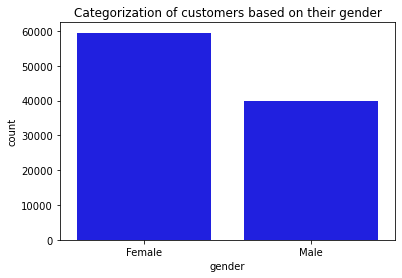

In [107]:
sns.countplot(x='gender',data=data,color='blue',label=True)
plt.title("Categorization of customers based on their gender")

this shows that there are more number of female shopping customers than male

##### countplot for the distribution of customers based on their mode of payment

<AxesSubplot:xlabel='payment_method', ylabel='count'>

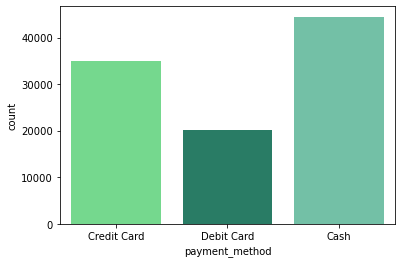

In [26]:
sns.countplot(x='payment_method',data=data,palette=['#64E986','#1B8A6B','#66CDAA'])


from this we can infer that most of the customers prefer CASH as their method of payment and less number of Customers prefer shopping through Debit Card

##### countplot to display the shopping done mothwise

<AxesSubplot:xlabel='Month', ylabel='count'>

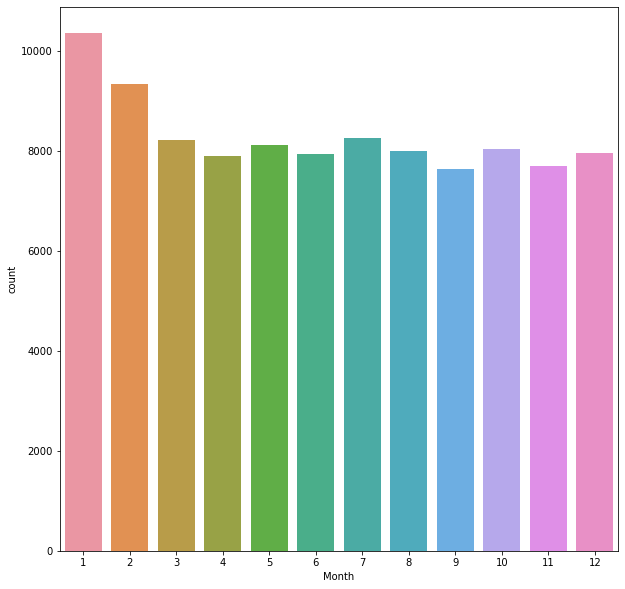

In [118]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x='Month',data=data,figure=fig)

##### lets create seperate column for each of the category type and draw conclusions from it

In [108]:
clothing=data[data['category']=='Clothing']
print(clothing.head())
print(clothing.describe())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
2    I127801     C266599    Male   20  Clothing         1   300.08   
5    I227836     C657758  Female   28  Clothing         5  1500.40   
7    I293112     C176086  Female   32  Clothing         2   600.16   
8    I293455     C159642    Male   69  Clothing         3   900.24   

  payment_method invoice_date     shopping_mall  Month  Year  
0    Credit Card   2022-05-08            Kanyon      5  2022  
2           Cash   2021-09-11         Metrocity      9  2021  
5    Credit Card   2022-05-24    Forum Istanbul      5  2022  
7    Credit Card   2021-01-13  Mall of Istanbul      1  2021  
8    Credit Card   2021-04-11         Metrocity      4  2021  
                age      quantity         price         Month          Year
count  34487.000000  34487.000000  34487.000000  34487.000000  34487.000000
mean      43.409227      3.002813    901.084021  

we can infer that the maximum age of customer doing clothing shopping is 69 and minimum age is 18. Also 50% of the customers are in the 40's. Also miniimum price spent on clothing is 300 and maximum price is 1500 and 50% of the customer spend around 900 on clothing.

In [109]:
Cosmetics=data[data['category']=='Cosmetics']
print(Cosmetics.head())
print(Cosmetics.describe())

   invoice_no customer_id  gender  age   category  quantity   price  \
6     I121056     C151197  Female   49  Cosmetics         1   40.66   
26    I196704     C289625  Female   25  Cosmetics         5  203.30   
29    I209744     C251229    Male   29  Cosmetics         3  121.98   
41    I138674     C155059    Male   67  Cosmetics         2   81.32   
42    I752693     C306662  Female   48  Cosmetics         3  121.98   

   payment_method invoice_date     shopping_mall  Month  Year  
6            Cash   2022-03-13      Istinye Park      3  2022  
26    Credit Card   2022-04-20  Mall of Istanbul      4  2022  
29    Credit Card   2021-04-29      Istinye Park      4  2021  
41    Credit Card   2022-02-14      Metropol AVM      2  2022  
42           Cash   2022-04-28         Metrocity      4  2022  
                age      quantity         price         Month          Year
count  15097.000000  15097.000000  15097.000000  15097.000000  15097.000000
mean      43.580645      3.011525    

we can infer that the maximum age of customer doing cosmetic shopping is 69 and minimum age is 18. Also 50% of the customers are in the 40's. Also minimum price spent on cosmetic is 40 and maximum price is 203 and 50% of the customer spend around 120s on cosmetic.

In [110]:
Food=data[data['category']=='Food_Beverage']
print(Food.head())
print(Food.describe())

   invoice_no customer_id  gender  age       category  quantity  price  \
10    I306368     C240286  Female   36  Food_Beverage         2  10.46   
17    I195744     C330667  Female   42  Food_Beverage         3  15.69   
21    I412481     C125696  Female   27  Food_Beverage         1   5.23   
35    I339732     C276887    Male   68  Food_Beverage         1   5.23   
40    I246550     C716788  Female   49  Food_Beverage         3  15.69   

   payment_method invoice_date      shopping_mall  Month  Year  
10           Cash   2022-12-25          Metrocity     12  2022  
17    Credit Card   2022-05-01       Zorlu Center      5  2022  
21           Cash   2021-01-05        Cevahir AVM      1  2021  
35    Credit Card   2023-04-01  Emaar Square Mall      4  2023  
40           Cash   2021-10-09       Zorlu Center     10  2021  
                age      quantity         price         Month          Year
count  14776.000000  14776.000000  14776.000000  14776.000000  14776.000000
mean      43.

we can infer that the maximum age of customer doing food shopping is 69 and minimum age is 18. Also 50% of the customers are in the 40's. Also minimum price spent on food is 5 and maximum price is 26 and 50% of the customer spend around 15 rs on food.

In [112]:
Toys=data[data['category']=='Toys']
print(Toys.head())
print(Toys.describe())

   invoice_no customer_id  gender  age category  quantity   price  \
12    I640508     C225330  Female   67     Toys         4  143.36   
19    I992454     C196845    Male   24     Toys         4  143.36   
25    I195396     C285161    Male   51     Toys         2   71.68   
30    I161949     C159164  Female   66     Toys         3  107.52   
56    I258195     C213742    Male   43     Toys         2   71.68   

   payment_method invoice_date     shopping_mall  Month  Year  
12     Debit Card   2022-07-31         Metrocity      7  2022  
19           Cash   2023-07-03       Cevahir AVM      7  2023  
25     Debit Card   2021-05-16      Istinye Park      5  2021  
30     Debit Card   2022-04-07  Mall of Istanbul      4  2022  
56           Cash   2021-11-26            Kanyon     11  2021  
                age      quantity         price         Month          Year
count  10087.000000  10087.000000  10087.000000  10087.000000  10087.000000
mean      43.326262      3.005948    107.733185  

we can infer that the maximum age of customer doing toys shopping is 69 and minimum age is 18. Also 50% of the customers are in the 40's. Also minimum price spent on toys is 35 and maximum price is 179 and 50% of the customer spend around 107 rs on toys.

In [113]:
Shoes=data[data['category']=='Shoes']
print(Shoes.head())
print(Shoes.describe())

   invoice_no customer_id  gender  age category  quantity    price  \
1     I317333     C111565    Male   21    Shoes         3  1800.51   
3     I173702     C988172  Female   66    Shoes         5  3000.85   
15    I688768     C362288    Male   24    Shoes         5  3000.85   
27    I217053     C192344    Male   50    Shoes         4  2400.68   
28    I655874     C447138  Female   65    Shoes         3  1800.51   

   payment_method invoice_date      shopping_mall  Month  Year  
1      Debit Card   2021-12-12     Forum Istanbul     12  2021  
3     Credit Card   2021-05-16       Metropol AVM      5  2021  
15    Credit Card   2021-07-11     Viaport Outlet      7  2021  
27           Cash   2022-10-10  Emaar Square Mall     10  2022  
28           Cash   2022-08-23        Cevahir AVM      8  2022  
                age      quantity         price         Month          Year
count  10034.000000  10034.000000  10034.000000  10034.000000  10034.000000
mean      43.454953      3.011461   1

we can infer that the maximum age of customer doing shoes shopping is 69 and minimum age is 18. Also 50% of the customers are in the 40's. Also minimum price spent on shoes is 600 and maximum price is 30000 and 50% of the customer spend around 1800 rs on shoes.

In [114]:
Souvenir=data[data['category']=='Souvenir']
print(Souvenir.head())
print(Souvenir.describe())

    invoice_no customer_id  gender  age  category  quantity  price  \
67     I204979     C173084  Female   24  Souvenir         5  58.65   
75     I870944     C169749    Male   41  Souvenir         3  35.19   
82     I151332     C168491    Male   30  Souvenir         2  23.46   
92     I317105     C177975  Female   30  Souvenir         5  58.65   
114    I317140     C326893  Female   56  Souvenir         5  58.65   

    payment_method invoice_date shopping_mall  Month  Year  
67      Debit Card   2021-03-14  Istinye Park      3  2021  
75     Credit Card   2021-08-06   Cevahir AVM      8  2021  
82            Cash   2021-03-25        Kanyon      3  2021  
92      Debit Card   2021-07-29        Kanyon      7  2021  
114           Cash   2022-10-19  Istinye Park     10  2022  
               age     quantity        price        Month         Year
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000
mean     43.393079     2.974795    34.894345     6.187037  2021.631526


we can infer that the maximum age of customer doing Souvenir shopping is 69 and minimum age is 18. Also 50% of the customers are in the 40's. Also minimum price spent on Souvenir is 11 and maximum price is 58 and 50% of the customer spend around 35 rs on Souvenir.

In [116]:
Technology=data[data['category']=='Technology']
print(Technology.head())
print(Technology.describe())

    invoice_no customer_id  gender  age    category  quantity   price  \
23     I252275     C313348    Male   44  Technology         5  5250.0   
53     I160777     C626042  Female   43  Technology         4  4200.0   
69     I883721     C236859  Female   44  Technology         5  5250.0   
90     I289643     C584700  Female   43  Technology         2  2100.0   
100    I283443     C189493    Male   43  Technology         3  3150.0   

    payment_method invoice_date     shopping_mall  Month  Year  
23            Cash   2021-10-26            Kanyon     10  2021  
53            Cash   2022-02-22         Metrocity      2  2022  
69     Credit Card   2021-11-19  Mall of Istanbul     11  2021  
90            Cash   2022-08-22            Kanyon      8  2022  
100    Credit Card   2022-05-25    Viaport Outlet      5  2022  
               age     quantity        price        Month         Year
count  4996.000000  4996.000000  4996.000000  4996.000000  4996.000000
mean     43.368495     3.0066

we can infer that the maximum age of customer doing technology shopping is 69 and minimum age is 18. Also 50% of the customers are in the 40's. Also minimum price spent on technology is 1050 and maximum price is 5250 and 50% of the customer spend around 3150 rs on technology.

In [117]:
Books=data[data['category']=='Books']
print(Books.head())
print(Books.describe())

   invoice_no customer_id  gender  age category  quantity  price  \
4     I337046     C189076  Female   53    Books         4  60.60   
11    I139207     C191708  Female   29    Books         1  15.15   
16    I294687     C300786    Male   65    Books         2  30.30   
24    I174250     C204553  Female   42    Books         5  75.75   
45    I117291     C134449    Male   46    Books         5  75.75   

   payment_method invoice_date      shopping_mall  Month  Year  
4            Cash   2021-10-24             Kanyon     10  2021  
11    Credit Card   2022-10-28  Emaar Square Mall     10  2022  
16     Debit Card   2021-01-16          Metrocity      1  2021  
24           Cash   2022-12-16          Metrocity     12  2022  
45    Credit Card   2022-09-12       Zorlu Center      9  2022  
               age     quantity        price        Month         Year
count  4981.000000  4981.000000  4981.000000  4981.000000  4981.000000
mean     43.541859     3.007830    45.568621     6.285284  

we can infer that the maximum age of customer doing books shopping is 69 and minimum age is 18. Also 50% of the customers are in the 40's. Also minimum price spent on books is 15 and maximum price is 75 and 50% of the customer spend around 45 rs on books.

##### lets create a model using KMeans that predicts and clasifies customers based on certain features into different categories

##### lets take 2 features into consideration . They are age and the price

In [119]:
feature=data[['age','price']]

##### feature should be normally distributed beacuse outliers can  affect the data, so we use np.log()

In [120]:
feature_log=np.log(feature)

##### feature should also be of the same scale

In [121]:
s_scaler=StandardScaler()
feature_scaled=s_scaler.fit_transform(feature_log)

##### lets create a plot with the elbow method to predict the number of clusters that are to be formed

Text(0.5, 0, 'Range')

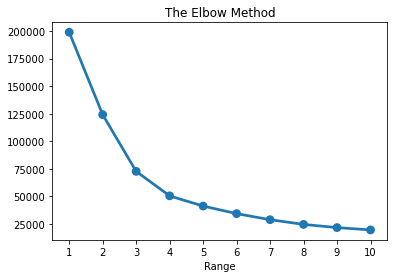

In [122]:
errors=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(feature_scaled)
    errors.append(model.inertia_)
sns.pointplot(x=list(range(1,11)),y=errors)
plt.title('The Elbow Method')
plt.xlabel('Range')

##### as we can see that elbow is created at point 3, so we make 3 clusters

##### create a model

In [125]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(feature_scaled)

KMeans(n_clusters=3, random_state=42)

##### add label to original data we did not process

In [126]:
data=data.assign(ClusterLabel=model.labels_)

##### aggregate

In [127]:
data.groupby("ClusterLabel")[['age','price']].median()

age    price
ClusterLabel              
0              25   300.08
1              50    35.84
2              52  1200.32

##### we can see that people with less age spend moderate money. The reasons can be freshers that are earning and spending money on things they desire

##### we can see that people with middle age spends less money . The reason can be middle age people also have more responsibilities like family,loans,saving for future,etc

##### we can see that people with more age spends more money. The reason can be aged people have taken their retirement and wants to fulfill all their dreams from the money earned

##### lets visualize this model graphically

In [128]:
fig=px.scatter(data_frame=data,x='age',y='price',title='Relationship between age and price',color='ClusterLabel')
fig